### Assignment - 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1. Perform comprehensive data preprocessing, including handling missing values, scaling, and feature selection, while visualizing key trends and correlations to enhance data insights and model performance.

## Data Pre-Processing

In [2]:
data = pd.read_csv('Data-Melbourne_F_fixed.csv')
data = pd.DataFrame(data)
data.head()

,Serial Number,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


In [3]:
#Labels for optimal:1 & non-optimal:0
data['Optimality'] = 10
low = data['Energy Consumption'].quantile(0.05)
high = data['Energy Consumption'].quantile(0.55)
data.loc[(data['Energy Consumption']>=low) & (data['Energy Consumption']<=high), 'Optimality'] = 1
data.loc[~((data['Energy Consumption']>=low) & (data['Energy Consumption']<=high)), 'Optimality'] = 0

data.head()
print(low)
print(high)

198111.05
281782.25


### a) Handling Missing Values

In [4]:
data.isna().sum()

Serial Number               0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
Optimality                  0
dtype: int64

This shows there are no Null values.

### b) Correlation

In [5]:
#Correlation Matrix
correlation = data[data.columns].corr()
correlation

,Serial Number,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,...,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Optimality
Serial Number,1.000000,0.308471,0.378175,0.232384,0.121004,-0.241955,0.228638,0.095041,-0.034638,-0.045970,...,0.027521,-0.075676,-0.207726,-0.039775,-0.022567,0.000486,0.983282,0.052026,0.017682,-0.173949
Average Outflow,0.308471,1.000000,0.541923,0.167099,0.040590,-0.115811,-0.022723,-0.061951,-0.000163,0.006070,...,-0.068941,-0.016560,-0.090001,-0.027635,-0.015406,-0.006319,0.308915,-0.012221,-0.061292,-0.124999
Average Inflow,0.378175,0.541923,1.000000,0.136211,-0.032709,-0.121364,0.018026,-0.035827,0.098149,0.093073,...,-0.012452,-0.040534,-0.100358,-0.031872,-0.025010,-0.012203,0.388505,-0.066273,-0.055009,-0.103421
Energy Consumption,0.232384,0.167099,0.136211,1.000000,-0.133076,-0.136945,0.000346,-0.167448,-0.266053,-0.245119,...,-0.004160,0.155245,-0.014242,0.007085,0.020656,0.017388,0.179876,0.272076,0.023010,-0.575757
Ammonia,0.121004,0.040590,-0.032709,-0.133076,1.000000,0.164753,0.284552,0.342995,0.110000,0.099279,...,-0.032908,-0.076970,-0.074313,-0.028647,-0.047966,-0.048622,0.140567,-0.112396,-0.029223,0.075510
Biological Oxygen Demand,-0.241955,-0.115811,-0.121364,-0.136945,0.164753,1.000000,0.524189,0.455843,0.150706,0.137368,...,-0.011270,-0.087240,0.001186,-0.019039,0.001384,0.000370,-0.228753,-0.065866,-0.000713,0.157656
Chemical Oxygen Demand,0.228638,-0.022723,0.018026,0.000346,0.284552,0.524189,1.000000,0.681225,0.083946,0.090018,...,0.002585,-0.152655,-0.055335,-0.050351,-0.029496,-0.006580,0.231927,-0.034368,0.005837,0.043042
Total Nitrogen,0.095041,-0.061951,-0.035827,-0.167448,0.342995,0.455843,0.681225,1.000000,0.269751,0.259386,...,0.006595,-0.210108,-0.012618,-0.053080,-0.029228,0.006540,0.120105,-0.142140,-0.007392,0.152864
Average Temperature,-0.034638,-0.000163,0.098149,-0.266053,0.110000,0.150706,0.083946,0.269751,1.000000,0.924944,...,0.013499,-0.553688,-0.004256,-0.122247,0.098620,0.219791,0.015400,-0.272413,-0.009542,0.208256
Maximum temperature,-0.045970,0.006070,0.093073,-0.245119,0.099279,0.137368,0.090018,0.259386,0.924944,1.000000,...,0.018942,-0.533249,-0.003110,-0.120905,0.035349,0.199370,-0.004957,-0.223353,0.006459,0.210478


<Axes: >

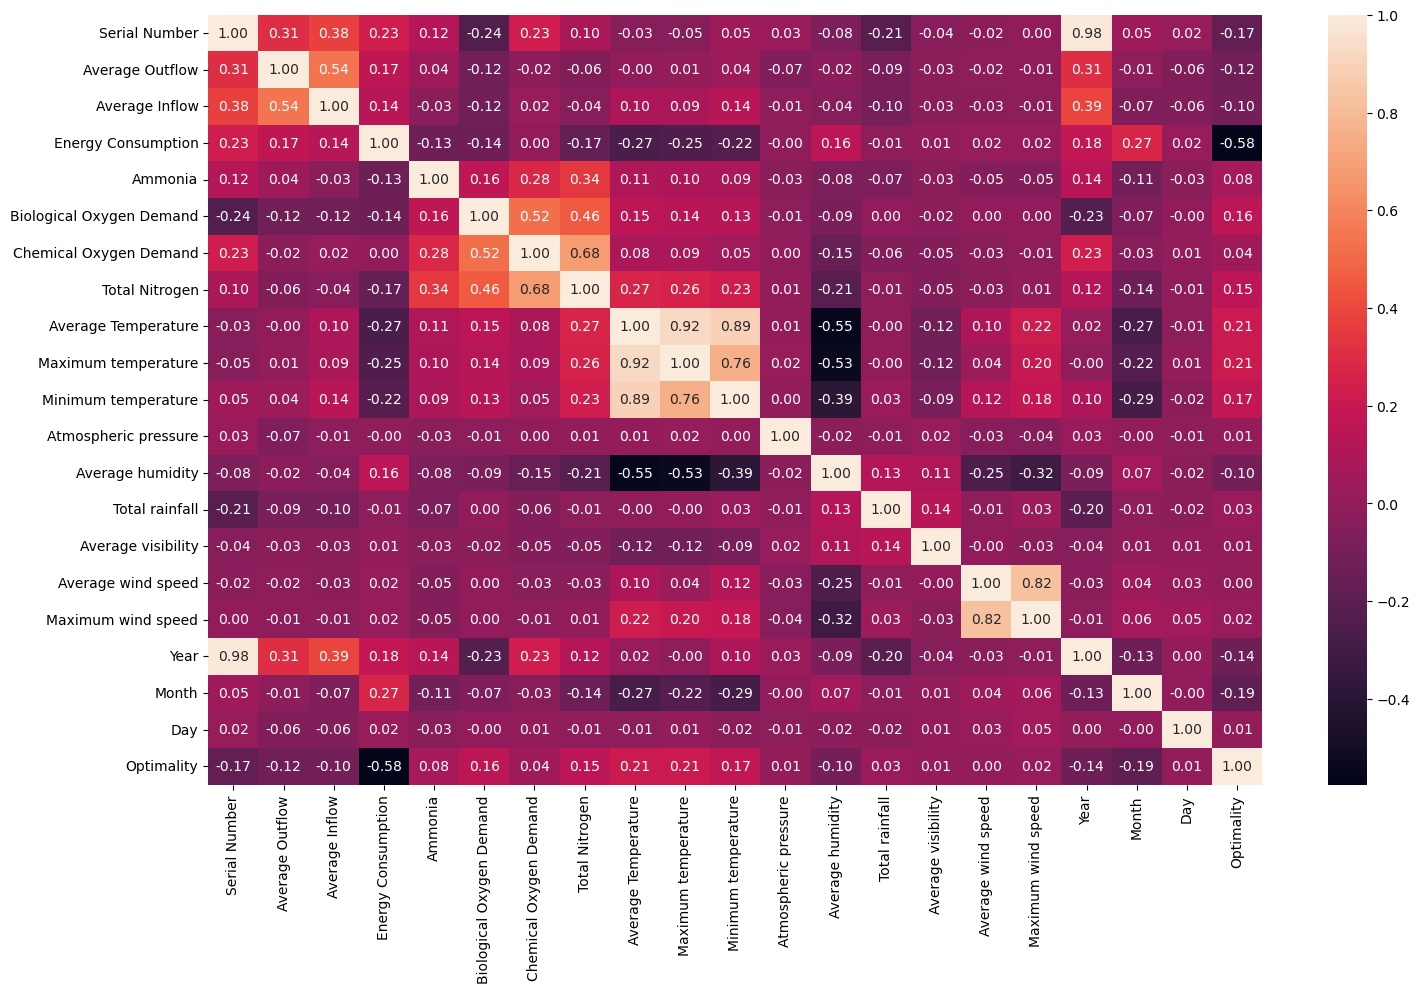

In [6]:
#Heatmap
plt.figure(figsize=(17, 10))
sns.heatmap(data=correlation, annot = True, fmt = '.2f')

### c) Outliners

{'whiskers': [<matplotlib.lines.Line2D at 0x2c4b18c49d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c4b23f8d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c4b16041d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2c4b23f9e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c4b23f8450>,
 'means': []}

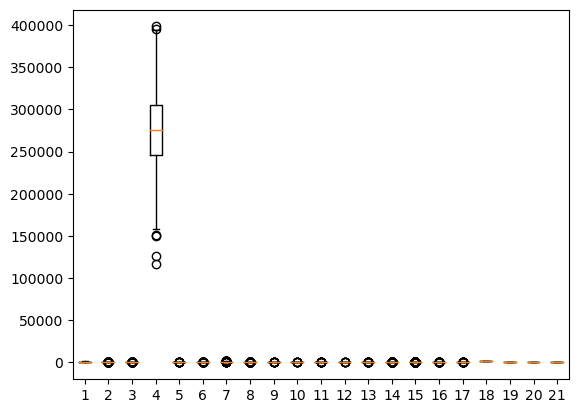

In [7]:
plt.boxplot(data)

In [8]:
#Percentile Method 
lower_cap = data.quantile(0.05)
upper_cap = data.quantile(0.95)

#Capping
data_capped = data.clip(lower=lower_cap, upper=upper_cap, axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c4b1b84510>,
 'caps': [<matplotlib.lines.Line2D at 0x2c4b1b855d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c4b1b6ec50>,
 'medians': [<matplotlib.lines.Line2D at 0x2c4b1b86710>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c4b1b09490>,
 'means': []}

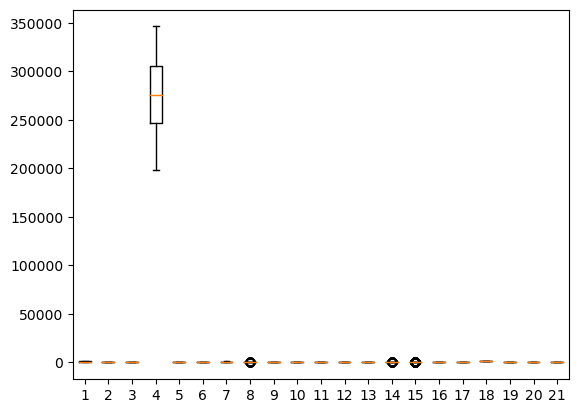

In [9]:
plt.boxplot(data_capped)

### d) Splitting & Feature Selection

In [10]:
from sklearn.model_selection import train_test_split

#Selecting Features
x = data_capped.drop(['Serial Number', 'Year', 'Month', 'Day', 'Optimality', ], axis=1)
y = data_capped['Optimality']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=32, test_size=0.2)

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

print('Shape of x_train :', x_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of x_test :', x_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of x_train : (1105, 16)
Shape of y_train : (1105,)
Shape of x_test : (277, 16)
Shape of y_test : (277,)


### e) Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### 2. Apply various machine learning algorithms to classify the operational state of the wastewater treatment process.

### Logistic Regression from Scratch

In [12]:
from sklearn.metrics import f1_score


#Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Cost Function (Based on log-loss)
def Cost_Function(x, y, beta):
    m = len(y)
    h = sigmoid(x @ beta)
    J = -1/m * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return J

#Gradient Descent
def gradient_descent(x, y, beta, alpha, iters):
    m = len(y)
    for i in range(iters):
        h = sigmoid(np.dot(x, beta))
        beta = beta - alpha * 1/m * (x.T @ (h - y))
    return beta

#Prediction Function
def predict(x, beta):
    probability = sigmoid(x @ beta)
    return [1 if prob >= 0.5 else 0 for prob in probability]

#Logistic Regression
def logistic_regression(x_train_scaled, x_test_scaled, y_train, y_test, alpha=0.1, iters=1000):

    x_train_scaled = np.c_[np.ones((x_train_scaled.shape[0], 1)), x_train_scaled]  
    x_test_scaled = np.c_[np.ones((x_test_scaled.shape[0], 1)), x_test_scaled]  
    
    print("Shape of x_train_scaled:", x_train_scaled.shape)
    print("Shape of x_test_scaled:", x_test_scaled.shape)

    # Initialize beta to zero
    beta = np.zeros(x_train_scaled.shape[1])  
    print("Shape of beta:", beta.shape)

    # Train the model
    weight = gradient_descent(x_train_scaled, y_train, beta, alpha, iters)

    # Make predictions on the test set
    predictions = predict(x_test_scaled, weight)

    return weight, predictions

weight, predictions = logistic_regression(x_train_scaled, x_test_scaled, y_train, y_test)
print("\nWeights:", weight)

# Model Evaluation
accuracy_scratch = np.mean(predictions == y_test)
print(f"\nManual Model- \nAccuracy: {accuracy_scratch:.2f}")
F1_scratch = f1_score(y_test, predictions)
print(f"F1 Score: {F1_scratch:.2f}")

Shape of x_train_scaled: (1105, 17)
Shape of x_test_scaled: (277, 17)
Shape of beta: (17,)

Weights: [-0.03641151  0.04896288 -0.04409492 -1.93556642 -0.03543727  0.18601516
 -0.0644743   0.10194998  0.01562193  0.23289902 -0.05818215  0.
  0.10100985  0.00429434  0.14901161  0.07506554  0.10071762]

Manual Model- 
Accuracy: 0.87
F1 Score: 0.88


### Logistic Regression from sklearn

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()

#Training the model
log_reg.fit(x_train_scaled, y_train)

#Prediction
y_pred_sklearn = log_reg.predict(x_test_scaled)

#Model Evaluation
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"sklearn- \nAccuracy: {accuracy_sklearn:.4f}")
F1_sklearn = f1_score(y_test, y_pred_sklearn)
print(f"F1 Score: {F1_sklearn:.2f}")

sklearn- 
Accuracy: 0.8773
F1 Score: 0.89


### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

#Training the model
knn_classifier.fit(x_train_scaled, y_train)

#Predictions
y_pred_knn = knn_classifier.predict(x_test_scaled)

#Model Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Classifier- \nAccuracy:", accuracy_knn)
F1_knn = f1_score(y_test, y_pred_knn)
print(f"F1 Score: {F1_knn:.2f}")

KNN Classifier- 
Accuracy: 0.7870036101083032
F1 Score: 0.81


### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

#Training the model
dt_classifier.fit(x_train_scaled, y_train)

#Predictions
y_pred_dt = dt_classifier.predict(x_test_scaled)


#Model Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier- \nAccuracy:", accuracy_dt)
F1_dt = f1_score(y_test, y_pred_dt)
print(f"F1 Score: {F1_dt:.2f}")

Decision Tree Classifier- 
Accuracy: 0.9963898916967509
F1 Score: 1.00


### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

#Training the model
rf_classifier.fit(x_train_scaled, y_train)

#Predictions
y_pred_rf = rf_classifier.predict(x_test_scaled)

#Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier- \nAccuracy:", accuracy_rf)
F1_rf = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {F1_rf:.2f}")

Random Forest Classifier- 
Accuracy: 0.9927797833935018
F1 Score: 0.99


###  Support Vector Machine 

In [17]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf')

#Training the model
svc_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_svc = svc_classifier.predict(x_test_scaled)

#Model Evaluation
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier- \nAccuracy:", accuracy_svc)
F1_svc = f1_score(y_test, y_pred_svc)
print(f"F1 Score: {F1_svc:.2f}")

Support Vector Classifier- 
Accuracy: 0.8808664259927798
F1 Score: 0.90


#### 3. Model Evaluation

### a) Metrics Comparison & Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confusion_scratch = confusion_matrix(y_test, predictions)
confusion_sklearn = confusion_matrix(y_test, y_pred_sklearn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
confusion_svm = confusion_matrix(y_test, y_pred_svc)


# Metrics Comparison
df = {
    'Metrics' : ['Accuracy', 'F1-Score','Confusion Matrix'],
    'LR Scratch' : [accuracy_scratch , F1_scratch, confusion_scratch],
    'LR sklearn' : [accuracy_sklearn, F1_sklearn, confusion_sklearn],
    'KNN' : [accuracy_knn, F1_knn, confusion_knn],
    'Decision Tree' : [accuracy_dt, F1_dt, confusion_dt],
    'Random Forest' : [accuracy_rf, F1_rf, confusion_rf],
    'SVM' : [accuracy_svc, F1_svc, confusion_svm]
}
df = pd.DataFrame(df)
df = df.set_index('Metrics')
df

,LR Scratch,LR sklearn,KNN,Decision Tree,Random Forest,SVM
Metrics,,,,,,
Accuracy,0.873646,0.877256,0.787004,0.99639,0.99278,0.880866
F1-Score,0.881356,0.885135,0.809061,0.996656,0.993333,0.896552
Confusion Matrix,"[[112, 16], [19, 130]]","[[112, 16], [18, 131]]","[[93, 35], [24, 125]]","[[127, 1], [0, 149]]","[[126, 2], [0, 149]]","[[101, 27], [6, 143]]"


### b) Hyperparameters Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

#Logistic Regression
param_grid_lr = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.01, 0.1, 1, 10, 100],
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100, 200, 500]
}

grid_search_lr = GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(x_train_scaled, y_train)
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [20]:
#KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],            
    'weights': ['uniform', 'distance'],        
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_knn.fit(x_train_scaled, y_train)
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [21]:
#Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],        
    'max_depth': [None, 3, 5, 10],           
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],          
    'max_features': [None, 'sqrt', 'log2']   
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train_scaled, y_train)
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [22]:
#Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False]               
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(x_train_scaled, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [23]:
#SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],                 
    'kernel': ['linear', 'rbf', 'poly'],     
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'degree': [2, 3, 4],                     
    'class_weight': [None, 'balanced']      
}

grid_search_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_svc.fit(x_train_scaled, y_train)
best_params_svc = grid_search_svc.best_params_
print("Best Hyperparameters for SVC:", best_params_svc)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Hyperparameters for SVC: {'C': 100, 'class_weight': None, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
